In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [35]:
df=pd.read_csv("/work/galaxies.csv")
df

X         Y
0    6.649504  2.223293
1    5.260232 -7.556045
2    6.164551  9.245618
3    5.033345  9.002009
4    3.674350 -7.836118
..        ...       ...
995  4.963106 -7.547204
996  6.147833 -8.742696
997  4.722672  9.892131
998  6.333305  2.750708
999  7.275561  4.521317

[1000 rows x 2 columns]

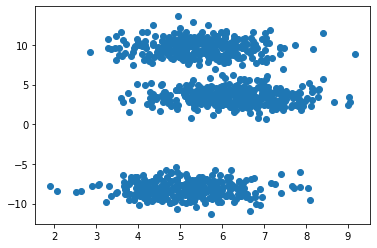

In [36]:
plt.scatter(df["X"],df["Y"])

In [37]:
X=df[["X","Y"]]
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 8)
k_means.fit(X)

KMeans(n_clusters=3, n_init=8)

In [38]:
labels = k_means.labels_

In [46]:
k_means_cluster_centers = k_means.cluster_centers_

result = np.where(k_means_cluster_centers == np.amax(k_means_cluster_centers,))

result=int(result[1])


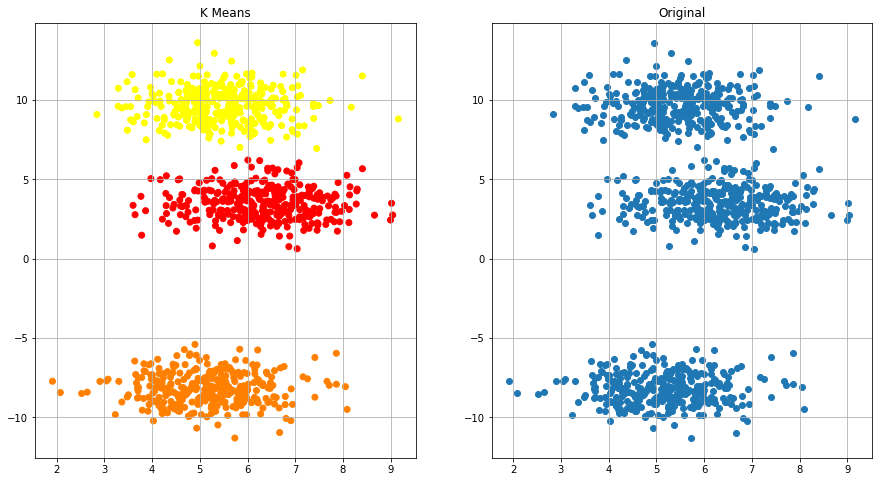

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.set_title('K Means')
ax1.scatter(df["X"],df["Y"],c=labels,cmap='autumn')
ax2.set_title("Original")
ax2.scatter(df["X"],df["Y"])
ax1.grid()
ax2.grid()

In [48]:
df["Labels"]=labels

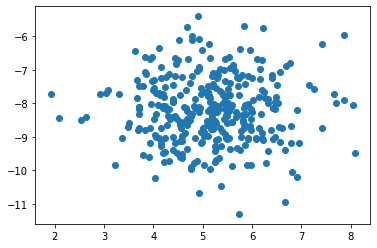

In [49]:
plt.scatter(df.loc[df["Labels"]==result]["X"],df.loc[df["Labels"]==result]["Y"])

In [50]:
x_baby=df.loc[df["Labels"]==result]["X"].max()

In [51]:
y_baby=df.loc[df["X"]==x_baby,"Y"]

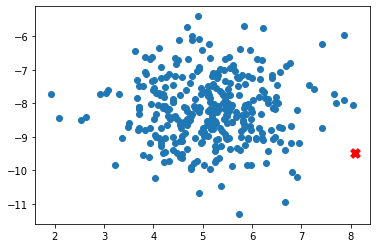

In [52]:
plt.scatter(df.loc[df["Labels"]==1]["X"],df.loc[df["Labels"]==1]["Y"])
plt.scatter(x_baby,y_baby,s=90, c='red', marker='X')

In [53]:
print(x_baby)
print(y_baby)

8.087337403292173
270   -9.499944
Name: Y, dtype: float64


In [54]:
df_new=pd.read_csv("/work/planet.csv")
df_new.head()

X         Y         Z      Temp   climate
0 -10.577706  2.279242 -0.865452 -8.438929 -9.494053
1  -7.427127  0.176410 -5.588608 -5.443329 -3.629749
2  -7.590300  7.121962  8.955229 -7.675402  8.909423
3  -8.850700  4.544747  0.616561 -7.159618 -8.560698
4   4.680549 -8.821567  5.156382  8.154624  9.046185

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from math import sqrt


pca = PCA(n_components=2)
#scaler = StandardScaler()
pipeline = make_pipeline(pca)

X_new=df_new[["X","Y","Z","Temp","climate"]].values


components = pipeline.fit_transform(X_new)

In [71]:
components

array([[15.2206992 , -6.28764661],
       [ 7.64862617, -6.1508611 ],
       [10.06956981, 12.71579601],
       ...,
       [13.94501983, -4.57651213],
       [ 1.51420595, -0.44318638],
       [11.7556062 , 13.10353981]])

In [57]:
# f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
# ax1.set_title('K Means')
# ax1.scatter(components[:,0],components[:,1],)#c=labels,cmap='autumn')
# ax2.set_title("Original")
# ax2.scatter(components[:,0],components[:,1])
# ax1.grid()
# ax2.grid()

In [58]:
model = KMeans(n_clusters=1)
model.fit(components)
gravity = model.predict(components)

xs = components[:, 0]
ys = components[:, 1]

centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

def min_distance(point, points):

    distances = []
    for i, p in enumerate(points):
        distances.append(sqrt((point[:,0] - points[i,0])**2 + (point[:,1] - points[i,1])**2))
    
    return distances

dist = min_distance(centroids, components)

def closest_point(points, distances):

    val, idx = min((val, idx) for (idx, val) in enumerate(distances))

    return points[idx]

coords = closest_point()

TypeError: closest_point() missing 2 required positional arguments: 'points' and 'distances'

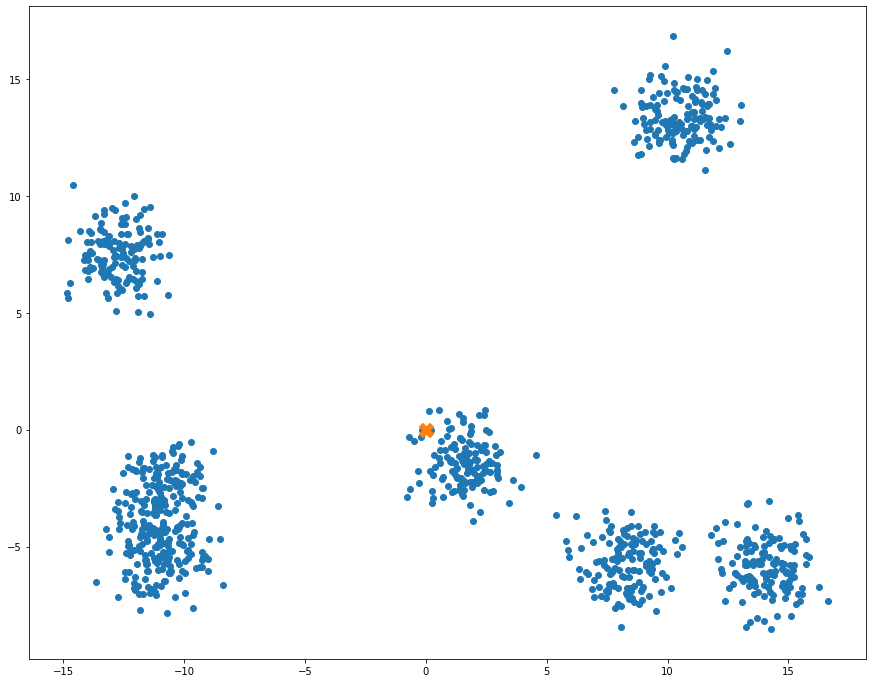

In [72]:
fig = plt.figure(figsize=(15,12))
plt.scatter(x=xs, y=ys)
plt.scatter(x=centroids_x, y=centroids_y, marker='X', s=200)
plt.show()

In [73]:
centroids_x

array([-3.7658765e-16])

In [74]:
centroids_y

array([4.60076421e-16])

In [62]:
list1=[]
list2=[]
for i in range(len(components[:,0])):
    list1.append((components[i,0])**2 +(components[i,1])**2)
    

list1.index(min(list1))

684

In [68]:
components[list1.index(min(list1))

array([-0.14618599, -0.0314799 ])

In [64]:
(components[999,0])**2

138.1942770521326

In [65]:
N = len(components)
x_mean = centroids_x
y_mean = centroids_y

b_upper=((components[:,0] - x_mean) * (components[:,1] - y_mean)).sum()
b_lower=((components[:,0] - x_mean)**2).sum()
b = b_upper / b_lower
    
a = y_mean - (b*x_mean)
    
print("a: ",a)
print("b: ",b)

a:  [4.60076421e-16]
b:  1.52397527898901e-16


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a70149da-7ba5-4906-a687-caea6d00d31b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>